In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    #if city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# print the city count to confirm suficiient count
len(cities)

639

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=871fd5a894c8e293d2e3ef714b59dbe1


In [8]:
#import the datatime module from the datetime library
from datetime import datetime

In [9]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval   ")
print("---------------------------")

#create counters
record_count = 1
set_count = 1

# loop thru all the cities in our list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i% 50 == 0 and i>=50):
        set_count+=1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({
            
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date })

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #indicate that Data Loading is complete.
    print("------------------------  ")
    print("Data Retrieval Complete   ")
    print("------------------------  ")


--------------------  
Data Retrieval Complete   
------------------------  
Processing Record 30 of Set 10 | kazalinsk
City not found. Skipping...
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 31 of Set 10 | turukhansk
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 32 of Set 10 | sambava
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 33 of Set 10 | galle
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 34 of Set 10 | harnosand
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 35 of Set 10 | belaya gora
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 36 of Set 10 | verkhnyaya inta
------------------------  
Data Retrieval Complete   
------------------------  
Processing Record 37 of 

In [10]:
len(city_data)

592

In [11]:
# convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambulu,-8.3450,113.6058,87.08,61,71,5.59,ID,2021-02-02 03:41:48
1,Longyearbyen,78.2186,15.6401,15.80,79,90,12.66,SJ,2021-02-02 03:38:59
2,Jamestown,42.0970,-79.2353,23.00,93,90,12.66,US,2021-02-02 03:41:48
3,Caldas Novas,-17.7417,-48.6250,68.56,91,100,0.83,BR,2021-02-02 03:41:48
4,Puerto Ayora,-0.7393,-90.3518,78.01,92,18,3.00,EC,2021-02-02 03:41:48
5,Sao Francisco De Assis,-29.5503,-55.1311,71.62,94,41,4.85,BR,2021-02-02 03:41:49
6,Necochea,-38.5473,-58.7368,59.00,83,61,6.64,AR,2021-02-02 03:41:49
7,Carutapera,-1.1950,-46.0200,78.87,85,100,7.63,BR,2021-02-02 03:41:49
8,Labuhan,-6.8844,112.2051,82.45,79,82,16.35,ID,2021-02-02 03:41:49
9,Da Lat,11.9465,108.4419,74.71,34,100,2.30,VN,2021-02-02 03:41:49


In [12]:
#create the output file csv
output_data_file  = "weather_data/cities.csv"
#export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

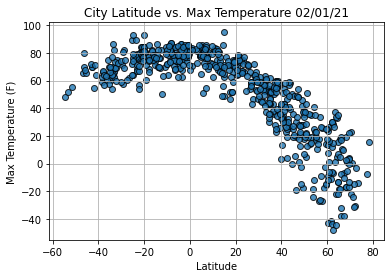

In [16]:
#import time module
import time

#build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats,
    max_temps,
    edgecolors="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label = "Cities")
    
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

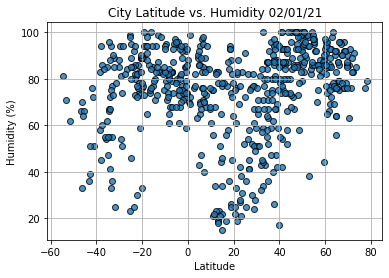

In [17]:
#build the scatter plot for latitude vs. humidity
plt.scatter(
    lats,
    humidity,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

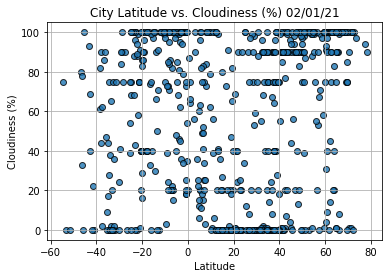

In [18]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(
    lats,
    cloudiness,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

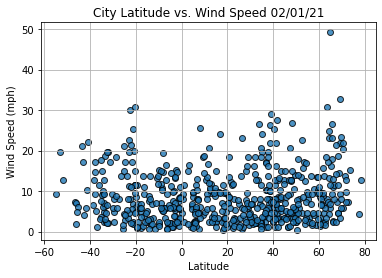

In [19]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(
    lats,
    wind_speed,
    edgecolors="k",
    linewidths=1,
    marker = "o",
    alpha = 0.8,
    label = "Cities")

#incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()